In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.DataFrame({
    "country": ['India', 'India', 'India', 'India', 'Australia', 'Australia', 'Australia', 'SA', 'SA', 'India', 'India'],
    "state" : ['MP', 'MP', 'MP', 'UP', 'NSW', 'NSW', 'Victoria', 'Gauteng', 'Western Cape', 'Delhi','UP'],
    "city": ['Indore', 'Bhopal', 'Jabalpur', 'Lucknow', 'Sydney', 'Newcastle', 'Melbourne', 'Johannesburg', 'Cape Town', 'Delhi', 'Noida'],
    "sales": [150, 200, 100, 100, 200, 250, 300, 300, 200, 100, 50]
})

In [3]:
df

,country,state,city,sales
0,India,MP,Indore,150
1,India,MP,Bhopal,200
2,India,MP,Jabalpur,100
3,India,UP,Lucknow,100
4,Australia,NSW,Sydney,200
5,Australia,NSW,Newcastle,250
6,Australia,Victoria,Melbourne,300
7,SA,Gauteng,Johannesburg,300
8,SA,Western Cape,Cape Town,200
9,India,Delhi,Delhi,100


In [40]:
df2 = pd.DataFrame(df.groupby(["country"]).agg({"sales": [np.sum, np.mean]}))

In [23]:
df.sort_values(by = "sales", ascending = False)

,country,state,city,sales
6,Australia,Victoria,Melbourne,300
7,SA,Gauteng,Johannesburg,300
5,Australia,NSW,Newcastle,250
1,India,MP,Bhopal,200
4,Australia,NSW,Sydney,200
8,SA,Western Cape,Cape Town,200
0,India,MP,Indore,150
2,India,MP,Jabalpur,100
3,India,UP,Lucknow,100
9,India,Delhi,Delhi,100


In [44]:
df1 = df.sort_values("country").reset_index(drop=True)
df1

,country,state,city,sales
0,Australia,NSW,Sydney,200
1,Australia,NSW,Newcastle,250
2,Australia,Victoria,Melbourne,300
3,India,MP,Indore,150
4,India,MP,Bhopal,200
5,India,MP,Jabalpur,100
6,India,UP,Lucknow,100
7,India,Delhi,Delhi,100
8,India,UP,Noida,50
9,SA,Gauteng,Johannesburg,300


In [3]:
a = 5
b = 8
if (a > 4) & (b < 9):
    print("True")
else:
    print("False")

True


In [6]:
df_test = pd.DataFrame({"country": ['A','A','B','C','C','C'], "sales": [25,75, 10, 20, 10, 20]})

In [7]:
df_test

,country,sales
0,A,25
1,A,75
2,B,10
3,C,20
4,C,10
5,C,20


In [10]:
def perc(x):
    return 100*(x/x.sum())

In [18]:
df_test["perc"] = df_test.groupby(['country']).apply(perc)

In [20]:
df_test

,country,sales,perc
0,A,25,25.0
1,A,75,75.0
2,B,10,100.0
3,C,20,40.0
4,C,10,20.0
5,C,20,40.0


In [31]:
df_test['sales_new'] = df_test.groupby(['country'])['sales'].shift(-1)

In [32]:
df_test

,country,sales,perc,sales_new
0,A,25,25.0,75.0
1,A,75,75.0,NaN
2,B,10,100.0,NaN
3,C,20,40.0,10.0
4,C,10,20.0,20.0
5,C,20,40.0,NaN


In [43]:
subjects = ['P','C','M']
names = ['Abhishek','Anvit','Shrasti']
subject = [subjects for i in range(len(names))]
long_df = pd.DataFrame({"name": names, "subject": subject})

In [47]:
long_df = long_df.explode('subject').reset_index(drop=True)

In [49]:
long_df['marks'] = [100,90,99,95,92,93,60,80,50]

In [50]:
long_df

,name,subject,marks
0,Abhishek,P,100
1,Abhishek,C,90
2,Abhishek,M,99
3,Anvit,P,95
4,Anvit,C,92
5,Anvit,M,93
6,Shrasti,P,60
7,Shrasti,C,80
8,Shrasti,M,50


In [53]:
short_df = long_df.pivot_table(index = 'name', columns = 'subject', values = 'marks').reset_index()

In [54]:
short_df

subject,name,C,M,P
0,Abhishek,90,99,100
1,Anvit,92,93,95
2,Shrasti,80,50,60


In [56]:
short_df.melt(id_vars = 'name', value_vars = ['C','M','P']).sort_values(['name'])

,name,subject,value
0,Abhishek,C,90
3,Abhishek,M,99
6,Abhishek,P,100
1,Anvit,C,92
4,Anvit,M,93
7,Anvit,P,95
2,Shrasti,C,80
5,Shrasti,M,50
8,Shrasti,P,60


In [19]:
df['sales2'] = df.groupby(['country'])['sales'].shift(1)

In [21]:
df["sales_diff"] = df["sales"] - df["sales2"]

In [23]:
df2 = pd.DataFrame({"name": ['Abhishek','Shrasti','Anvit'], "maths":[100, 50, 80], "physics": [99,10, 90]})

In [24]:
df2

,name,maths,physics
0,Abhishek,100,99
1,Shrasti,50,10
2,Anvit,80,90


In [26]:
df3 = df2.melt(id_vars = ["name"], value_vars = ["maths","physics"], var_name = "subject", value_name = "marks")

In [27]:
df3

,name,subject,marks
0,Abhishek,maths,100
1,Shrasti,maths,50
2,Anvit,maths,80
3,Abhishek,physics,99
4,Shrasti,physics,10
5,Anvit,physics,90


In [29]:
df3.pivot_table(values = "marks", index = "name", columns = "subject")

subject,maths,physics
name,,
Abhishek,100,99
Anvit,80,90
Shrasti,50,10


In [37]:
text = "My name is Abhishek Bansal"
text2 = ["Abhishek", "is", "Piss","Kiss","Anvit"]

In [41]:
re.findall("is", text)

['is', 'is']

In [39]:
help(re.findall)

Help on function findall in module re:

findall(pattern, string, flags=0)
    Return a list of all non-overlapping matches in the string.
    
    If one or more capturing groups are present in the pattern, return
    a list of groups; this will be a list of tuples if the pattern
    has more than one group.
    
    Empty matches are included in the result.



In [47]:
df[df.country.str.contains("lia")]

,country,state,city,sales,sales2,sales_diff
4,Australia,NSW,Sydney,200,NaN,NaN
5,Australia,NSW,Newcastle,250,200.0,50.0
6,Australia,Victoria,Melbourne,300,250.0,50.0


In [5]:
dfa = pd.DataFrame({'name': ["Abhishek","Shrasti","Anvit","Akash"]
                   , 'maths': [10,20,30,40]})
dfb = pd.DataFrame({'name': ["Abhishek","Shrasti","Anvit"]
                   , 'english': [30,40,10]})

In [24]:
df_new = dfa.merge(dfb, left_on = "name", right_on = "name", how = "outer", indicator = True)

In [11]:
df_new = pd.DataFrame({
    'date1' : ['2020-12-01', '2020-12-02', '2020-12-03'],
    'date2' : ['01/12/2020', '02/12/2020', '03/12/2020'],
    'sales' : [100,120,150]
})

In [12]:
df_new

,date1,date2,sales
0,2020-12-01,01/12/2020,100
1,2020-12-02,02/12/2020,120
2,2020-12-03,03/12/2020,150


In [17]:
df_new['date2_new'] = pd.to_datetime(df_new['date2'], format = '%d/%m/%Y')

In [18]:
df_new

,date1,date2,sales,date1_new,date2_new
0,2020-12-01,01/12/2020,100,2020-12-01,2020-12-01
1,2020-12-02,02/12/2020,120,2020-12-02,2020-12-02
2,2020-12-03,03/12/2020,150,2020-12-03,2020-12-03


In [52]:
df_new[df_new.isnull().any(axis=1)]

,name,maths,english,_merge
3,Akash,40,NaN,left_only


In [55]:
df_new[(df_new.maths >= 20) | (df_new.english >= 20)]

,name,maths,english,_merge
0,Abhishek,10,30.0,both
1,Shrasti,20,40.0,both
2,Anvit,30,10.0,both
3,Akash,40,NaN,left_only


In [56]:
a = [1,2]

In [59]:
np.array(a) * 2

array([2, 4])

In [ ]:
a = [""]

In [3]:
data = sns.load_dataset('iris')

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
data.groupby('species').agg({'sepal_length': ['sum','min'], 'sepal_width': ['sum','min']})

sepal_length      sepal_width     
                    sum  min         sum  min
species                                      
setosa            250.3  4.3       171.4  2.3
versicolor        296.8  4.9       138.5  2.0
virginica         329.4  4.9       148.7  2.2

In [1]:
?str.split

In [3]:
x = str.split("1 2 3")

In [4]:
x

['1', '2', '3']

In [8]:
len(x)

3

In [9]:
y = [int(i) for i in x]

In [10]:
y

[1, 2, 3]

In [14]:
np.zeros(y)

array([[[0., 0., 0.],
        [0., 0., 0.]]])

In [15]:
a = [[1,2,3],[4,5,6]]
len(a)

2

In [17]:
a[0][1]

2

In [3]:
a = [3,4,8]

In [5]:
a = set(a)

In [8]:
a - set([4])

{3, 8}

In [9]:
a = list(a)

In [10]:
a

[8, 3, 4]

In [11]:
type(a)

list

In [12]:
b = [2,3,4]

In [13]:
type(b)

list

In [14]:
b = [4,2,6]

In [17]:
b = "abhishek"

In [19]:
b[0:6]

'abhish'

In [28]:
a = "aBhi bansal"

In [29]:
b = str.split(a)

In [23]:
b

['abhi', 'bansal']

In [26]:
str.capitalize(b[0])

'Abhi'

In [30]:
b[0].swapcase()

'AbHI'

In [31]:
b

['aBhi', 'bansal']

In [32]:
print(b)

['aBhi', 'bansal']


In [35]:
len("abh")

3

In [36]:
"abh".upper()

'ABH'

In [51]:
a = ["abh","bansal"]

In [53]:
a[0][1]

'b'

In [54]:
len(a[0])

3

In [57]:
a = {"x":"hello", "y":"bye"}

In [58]:
a

{'x': 'hello', 'y': 'bye'}

In [59]:
a.keys()

dict_keys(['x', 'y'])

In [60]:
a.values()

dict_values(['hello', 'bye'])

In [63]:
repr(123)

'123'

In [65]:
eval('a')

{'x': 'hello', 'y': 'bye'}

In [66]:
a

{'x': 'hello', 'y': 'bye'}

In [74]:
b="ab is"

In [76]:
b.capitalize()

'Ab is'

In [77]:
L = [1,2,3]

In [78]:
L[-2]

2

In [79]:
L.insert(1,9)

In [80]:
L

[1, 9, 2, 3]

In [81]:
L.pop()

3

In [82]:
L

[1, 9, 2]

In [83]:
L = [2,3,1,4,1,5]

In [84]:
L.remove(1)

In [85]:
L

[2, 3, 4, 1, 5]

In [87]:
L + [9]

[2, 3, 4, 1, 5, 9]

In [88]:
L.append(1)

In [89]:
L

[2, 3, 4, 1, 5, 1]

In [91]:
dict([["a",123],["b",456]])

{'a': 123, 'b': 456}

In [98]:
df

,country,state,city,sales
0,India,MP,Indore,150
1,India,MP,Bhopal,200
2,India,MP,Jabalpur,100
3,India,UP,Lucknow,100
4,Australia,NSW,Sydney,200
5,Australia,NSW,Newcastle,250
6,Australia,Victoria,Melbourne,300
7,SA,Gauteng,Johannesburg,300
8,SA,Western Cape,Cape Town,200
9,India,Delhi,Delhi,100


In [101]:
df.groupby(["country","state"]).agg({"sales":sum})

sales
country   state              
Australia NSW             450
          Victoria        300
India     Delhi           100
          MP              450
          UP              150
SA        Gauteng         300
          Western Cape    200

In [104]:
pop = pd.DataFrame({"name" : ["India","Australia"], "pop": ["1.2Bn", "5Mn"]})

In [105]:
pop

,name,pop
0,India,1.2Bn
1,Australia,5Mn


In [106]:
new_df = df.merge(pop, left_on = "country", right_on = "name", how = "left")

In [107]:
new_df

,country,state,city,sales,name,pop
0,India,MP,Indore,150,India,1.2Bn
1,India,MP,Bhopal,200,India,1.2Bn
2,India,MP,Jabalpur,100,India,1.2Bn
3,India,UP,Lucknow,100,India,1.2Bn
4,Australia,NSW,Sydney,200,Australia,5Mn
5,Australia,NSW,Newcastle,250,Australia,5Mn
6,Australia,Victoria,Melbourne,300,Australia,5Mn
7,SA,Gauteng,Johannesburg,300,NaN,NaN
8,SA,Western Cape,Cape Town,200,NaN,NaN
9,India,Delhi,Delhi,100,India,1.2Bn


In [114]:
new_df[new_df.isnull().any(axis=1)]

,country,state,city,sales,name,pop
7,SA,Gauteng,Johannesburg,300,NaN,NaN
8,SA,Western Cape,Cape Town,200,NaN,NaN


In [117]:
new_df["name"] = new_df["name"].fillna("test")

In [119]:
pop

,name,pop
0,India,1.2Bn
1,Australia,5Mn


In [122]:
pop_new = pd.DataFrame({"new_pop": ["1.5Bn","6Mn"]})

In [123]:
pop_new

,new_pop
0,1.5Bn
1,6Mn


In [127]:
pd.concat([pop,pop_new], axis=1)

,name,pop,new_pop
0,India,1.2Bn,1.5Bn
1,Australia,5Mn,6Mn


In [128]:
pop2 = pd.DataFrame({"name":["SA"], "pop":["2Mn"]})

In [129]:
pop2

,name,pop
0,SA,2Mn


In [132]:
pd.concat([pop, pop2]).reset_index(drop=True)

,name,pop
0,India,1.2Bn
1,Australia,5Mn
2,SA,2Mn


In [138]:
df["country"].nunique()

3

In [141]:
df["sales_new"] = df["sales"].shift(1)

In [142]:
df

,country,state,city,sales,sales_new
0,India,MP,Indore,150,NaN
1,India,MP,Bhopal,200,150.0
2,India,MP,Jabalpur,100,200.0
3,India,UP,Lucknow,100,100.0
4,Australia,NSW,Sydney,200,100.0
5,Australia,NSW,Newcastle,250,200.0
6,Australia,Victoria,Melbourne,300,250.0
7,SA,Gauteng,Johannesburg,300,300.0
8,SA,Western Cape,Cape Town,200,300.0
9,India,Delhi,Delhi,100,200.0


In [150]:
df.sort_values(by = ["country","sales"], ascending = [True,False])

,country,state,city,sales,sales_new
6,Australia,Victoria,Melbourne,300,250.0
5,Australia,NSW,Newcastle,250,200.0
4,Australia,NSW,Sydney,200,100.0
1,India,MP,Bhopal,200,150.0
0,India,MP,Indore,150,NaN
2,India,MP,Jabalpur,100,200.0
3,India,UP,Lucknow,100,100.0
9,India,Delhi,Delhi,100,200.0
10,India,UP,Noida,50,100.0
7,SA,Gauteng,Johannesburg,300,300.0


In [154]:
df["rank"] = df.groupby("country")["sales"].rank(ascending=False, method = "dense")

In [159]:
df["rank2"] = df.sort_values(by = ["country","sales"], ascending=[True, False]).groupby("country")["sales"].cumcount() + 1

In [160]:
df

,country,state,city,sales,sales_new,rank,rank2
0,India,MP,Indore,150,NaN,2.0,2
1,India,MP,Bhopal,200,150.0,1.0,1
2,India,MP,Jabalpur,100,200.0,3.0,3
3,India,UP,Lucknow,100,100.0,3.0,4
4,Australia,NSW,Sydney,200,100.0,3.0,3
5,Australia,NSW,Newcastle,250,200.0,2.0,2
6,Australia,Victoria,Melbourne,300,250.0,1.0,1
7,SA,Gauteng,Johannesburg,300,300.0,1.0,1
8,SA,Western Cape,Cape Town,200,300.0,2.0,2
9,India,Delhi,Delhi,100,200.0,3.0,5


In [177]:
df.groupby("country").agg({"sales": [min, max, sum, np.mean, np.median]})

sales                             
            min  max  sum        mean median
country                                     
Australia   200  300  750  250.000000    250
India        50  200  700  116.666667    100
SA          200  300  500  250.000000    250

In [181]:
a = "aBc"
a.swapcase()

'AbC'

In [184]:
a = "my name is Abhishek Bansal"

In [191]:
print "s" + 1

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("s" + 1)? (<ipython-input-191-14d3411624e3>, line 1)

In [192]:
type(1.0)

float

In [198]:
print("" and "b")

In [199]:
def test(x):
    x = [1,2]

In [200]:
y = [3,4]

In [201]:
test(y)

In [202]:
print(y)

[3, 4]


In [1]:
s = "abc"

In [2]:
for i in s:
    print(i)

a
b
c


In [4]:
s[0].upper()

'A'

In [9]:
hash((0,0))

-8458139203682520985

In [12]:
re.search(r'\d+','1234')

<re.Match object; span=(0, 4), match='1234'>

In [26]:
t = re.search('aa', 'aabaa')

In [27]:
t is None

False

In [31]:
"a" and "b"

'b'

In [ ]:
# concatenate numpy arrays
x = np.array([3,4,9])
y = np.array([4,2,5])
np.concatenate([x,y])

In [24]:
x = np.arange(1,1000)

In [25]:
y = np.log(x)

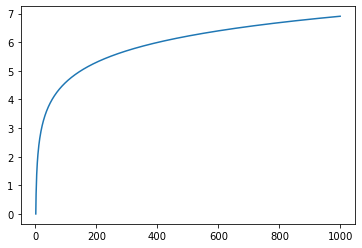

In [28]:
plt.plot(x,y)